# Group 39-007 Project Proposal- Can a Tennis Player's Continent Predict Their Current Ranking?

### Introduction:

This data is from the ultimate statistics website domain and depicts the player stats from the results of several international big-league tennis tournaments between 2017 and 2019. The data organizes the number of matches that have taken place, and allow fans and sports officials to pull different pieces of information about the players and their personal statistics.

The data set summarizes the general relevant information of each player, including their age, hand of play, country of origin, as well as several additional details. This information can help to explain the players' abilities and winnings. Conclusively, this data provides insight and comprehensive data revolving around the status of these internationally-ranked tennis players. 

Using the data, we hope to determine whether we can find a correlation between country and rankings of players, asking the question: can we predict a player's ranking based on their continent of origin?

### Preliminary Exploratory Data Analysis:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(dplyr)
library(readxl)
install.packages("countrycode")
library(countrycode)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
url = "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file(url, "playerstats.csv")
playerStateData <- read_csv("playerstats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
playerStateData_new <- select(playerStateData,"Age","Country","Current Rank","Best Rank") |> 
        filter(!is.na(Country)) |>
        mutate(Age_only = as.numeric(gsub("\\s*\\(.*\\)", "", Age)),
               Current_Rank_New = as.numeric(gsub("\\s*\\(.*\\)", "", `Current Rank`)),
               Best_Rank_New = as.numeric(gsub("\\s*\\(.*\\)", "", `Best Rank`)),
               Continent = countrycode(Country, "country.name", "continent")) |> mutate(Continent = as_factor(Continent))
playerStateData_new

Age,Country,Current Rank,Best Rank,Age_only,Current_Rank_New,Best_Rank_New,Continent
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
26 (25-04-1993),Brazil,378 (97),363 (04-11-2019),26,378,363,Americas
18 (22-12-2001),United Kingdom,326 (119),316 (14-10-2019),18,326,316,Europe
32 (03-11-1987),Slovakia,178 (280),44 (14-01-2013),32,178,44,Europe
21 (29-05-1998),"Korea, Republic of",236 (199),130 (10-04-2017),21,236,130,Asia
27 (21-10-1992),Australia,183 (273),17 (11-01-2016),27,183,17,Oceania
22 (11-02-1997),Poland,31 (1398),31 (20-01-2020),22,31,31,Europe
28 (18-11-1991),United States,307 (131),213 (31-10-2016),28,307,213,Americas
21 (12-05-1998),"Taiwan, Province of China",232 (205),229 (04-11-2019),21,232,229,Asia
25 (29-07-1994),Uzbekistan,417 (81),253 (17-07-2017),25,417,253,Asia


In [4]:
playerStatData_scaled <- playerStateData_new |>
  mutate(scaled_age = scale(Age_only, center = TRUE),
         scaled_Current_Rank = scale(Current_Rank_New, center = TRUE),
         scaled_Best_Rank = scale(Best_Rank_New, center = TRUE))
playerStatData_scaled

Age,Country,Current Rank,Best Rank,Age_only,Current_Rank_New,Best_Rank_New,Continent,scaled_age,scaled_Current_Rank,scaled_Best_Rank
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
26 (25-04-1993),Brazil,378 (97),363 (04-11-2019),26,378,363,Americas,0.007196728,0.89949306,1.36146997
18 (22-12-2001),United Kingdom,326 (119),316 (14-10-2019),18,326,316,Europe,-1.788386848,0.53682720,1.01524922
32 (03-11-1987),Slovakia,178 (280),44 (14-01-2013),32,178,44,Europe,1.353884410,-0.49537564,-0.98841132
21 (29-05-1998),"Korea, Republic of",236 (199),130 (10-04-2017),21,236,130,Asia,-1.115043007,-0.09086372,-0.35490100
27 (21-10-1992),Australia,183 (273),17 (11-01-2016),27,183,17,Oceania,0.231644675,-0.46050393,-1.18730409
22 (11-02-1997),Poland,31 (1398),31 (20-01-2020),22,31,31,Europe,-0.890595060,-1.52060414,-1.08417450
28 (18-11-1991),United States,307 (131),213 (31-10-2016),28,307,213,Americas,0.456092622,0.40431467,0.25651012
21 (12-05-1998),"Taiwan, Province of China",232 (205),229 (04-11-2019),21,232,229,Asia,-1.115043007,-0.11876109,0.37437250
25 (29-07-1994),Uzbekistan,417 (81),253 (17-07-2017),25,417,253,Asia,-0.217251219,1.17149246,0.55116608


In [5]:
playerState_split <- initial_split(playerStatData_scaled, prop = 0.75, strata = Continent)
playerState_train <- training(playerState_split)
playerState_train

Age,Country,Current Rank,Best Rank,Age_only,Current_Rank_New,Best_Rank_New,Continent,scaled_age,scaled_Current_Rank,scaled_Best_Rank
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
28 (18-11-1991),United States,307 (131),213 (31-10-2016),28,307,213,Americas,0.456092622,0.40431467,0.25651012
19 (08-08-2000),Canada,22 (1701),17 (14-10-2019),19,22,17,Americas,-1.563938901,-1.58337323,-1.18730409
28 (28-11-1991),Ecuador,148 (359),143 (14-10-2019),28,148,143,Americas,0.456092622,-0.70460595,-0.25913781
28 (17-03-1991),Canada,134 (411),134 (18-11-2019),28,134,134,Americas,0.456092622,-0.80224676,-0.32543540
22 (28-10-1997),United States,34 (1335),25 (05-08-2019),22,34,25,Americas,-0.890595060,-1.49968111,-1.12837290
21 (13-08-1998),Argentina,228 (208),228 (20-01-2020),21,228,228,Americas,-1.115043007,-0.14665847,0.36700610
27 (24-05-1992),Argentina,384 (94),166 (16-09-2013),27,384,166,Americas,0.231644675,0.94133912,-0.08971064
27 (07-05-1992),United States,304 (131),40 (17-07-2017),27,304,40,Americas,0.231644675,0.38339164,-1.01787691
27 (16-08-1992),Argentina,14 (2130),11 (11-06-2018),27,14,11,Americas,0.231644675,-1.63916798,-1.23150248


Warning message:
“Removed 2 rows containing missing values (geom_point).”


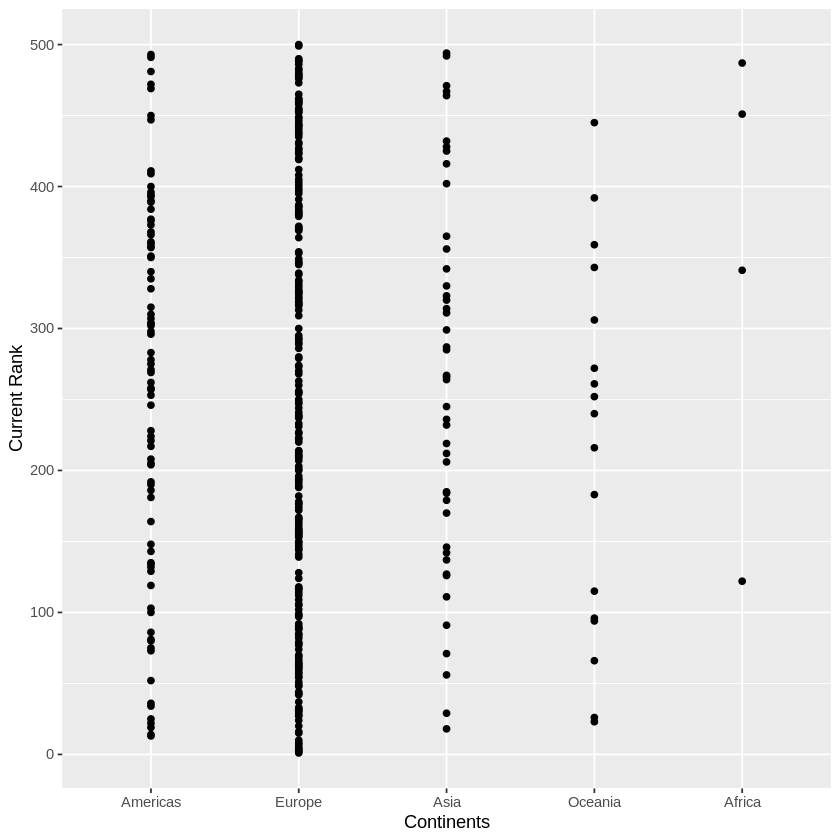

In [6]:
playerStat_plot_scatere1 <- ggplot(playerState_train, aes(x = Continent, y = Current_Rank_New)) + 
    geom_point() +
    labs(x= "Continents", y = "Current Rank")
playerStat_plot_scatere1

Warning message:
“Removed 2 rows containing missing values (geom_point).”


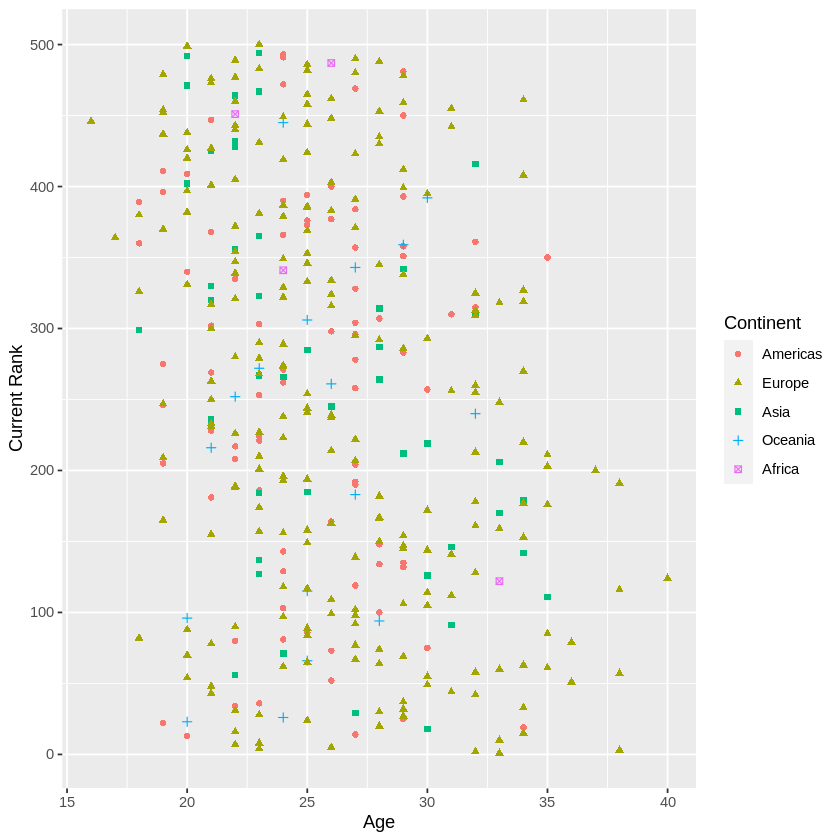

In [7]:
playerStat_plot_scatere2 <- ggplot(playerState_train, aes(x = Age_only, y = Current_Rank_New)) + 
    geom_point(aes(colour = Continent, shape = Continent)) +
    labs(x= "Age", y = "Current Rank")
playerStat_plot_scatere2

### Methods:

To conduct our data analysis, we will select the columns 'Country' and 'Current Rank' from the tennis player stats data set, and then use a built-in program in R to sort the 'Country' column into a new column called 'Continent'. Using the 'Continent' and 'Current Rank' columns, we will try and predict a player's current rank based on their continent by using K nearest neighbours regression. We will visualize our results using a scatter plot, where we can see whether there is a correlation between continent and current rank.

### Expected Outcomes and Significance:

From this project, we expect to find a moderate relationship between the continent the players are from and their current rank, particularly with Europe having higher ranking tennis players.

A relationship between these two variables would express that a player's background plays a major role in how well they do in their tennis careers, and this could create opportunities for advancement in the sport. This information is a stepping stone into further research on how specific training methods from countries/continents are more productive and yield better results in tennis.

This knowledge could lead to more research opportunities that investigate how long the players have spent in their original countries and whether their chosen coaches follow the same training style. Researching to what extent the coach's background affects the players' results would be the next step in this process. As well, another question could investigate whether genetics plays a role in tennis, and whether a certain physical trait causes a major advantage in training or play style.

#### Note:

After completing our project proposal, we can see that there is no correlation between a tennis player's continent and current ranking, making it difficult/impossible for our classifier to predict a player's current ranking from their continent. Therefore, we would like to change our research question to explore a different, yet similar question that might have more of a relationship: is there a correlation between a player's best ranking and their age at their best ranking? We hope to be able to predict when a player will be at their best, using the same procedures outlined above.